In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df_index = pd.read_csv("economic_index.csv")

In [4]:
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [5]:
# drop unnecessary columns
df_index.drop(columns=['Unnamed: 0', 'year','month'], axis=1, inplace=True)

In [6]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [7]:
# check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

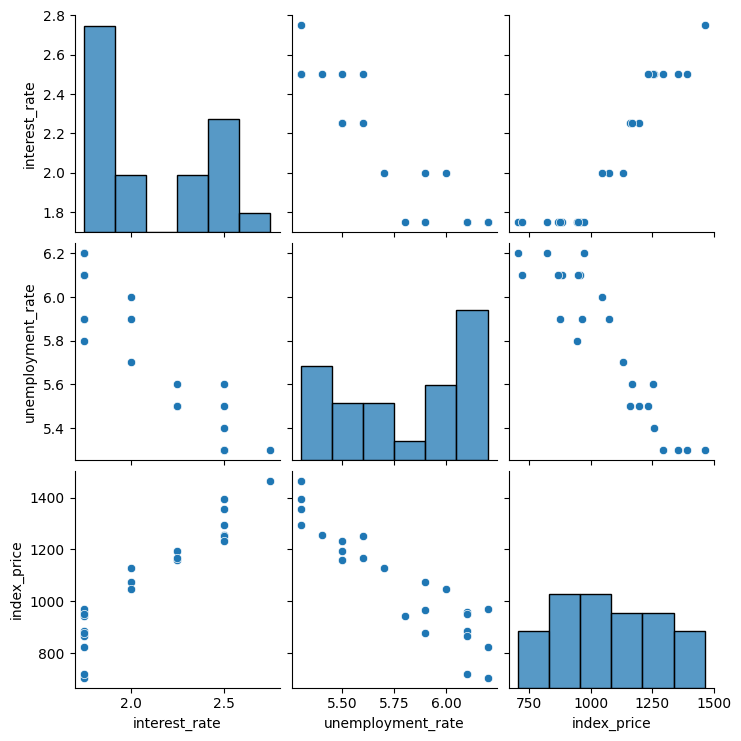

In [8]:
## Let's do some visualization to see the data
import seaborn as sns
sns.pairplot(df_index)

In [9]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


### Visualize the datapoints more closely

Text(0, 0.5, 'Unemployment Rate')

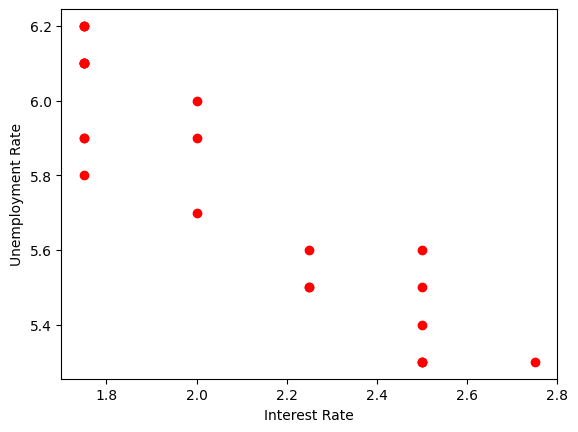

In [11]:
plt.scatter(df_index['interest_rate'], df_index['unemployment_rate'], color='r')
plt.xlabel("Interest Rate")
plt.ylabel("Unemployment Rate")

### Independent and dependent features

In [12]:
X = df_index.iloc[:, :-1]
y = df_index.iloc[:, -1]

In [13]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [14]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [15]:
# train-test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [16]:
import seaborn as sns

<Axes: xlabel='interest_rate', ylabel='index_price'>

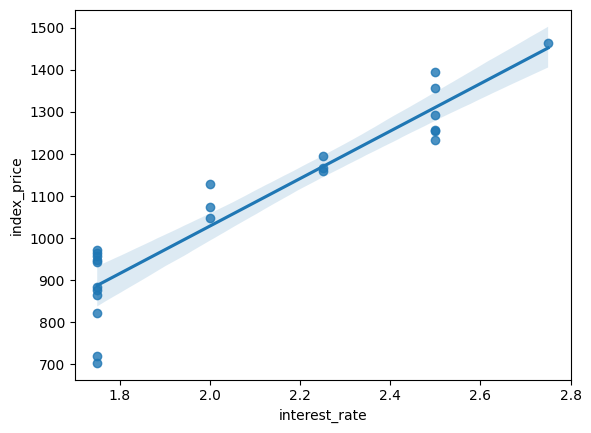

In [19]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

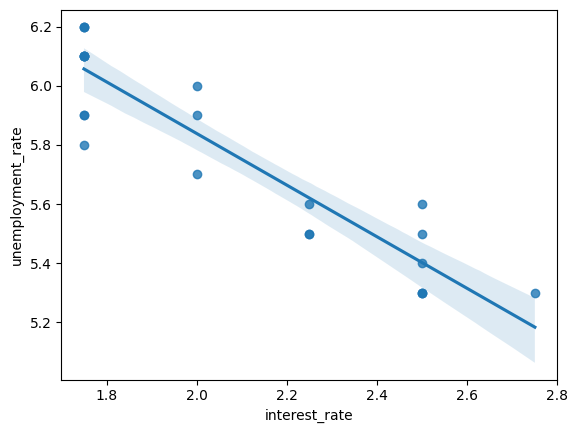

In [20]:
sns.regplot(x=df_index['interest_rate'], y=df_index['unemployment_rate'])

<Axes: xlabel='interest_rate', ylabel='index_price'>

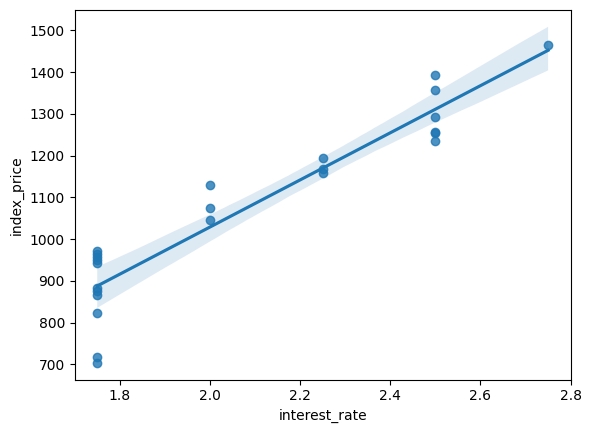

In [23]:
sns.regplot(x=df_index['interest_rate'], y=df_index['index_price'])

In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [26]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [28]:
regression.fit(X_train, y_train)

LinearRegression()

## Cross Validation

In [30]:
from sklearn.model_selection import cross_val_score
validation_score = cross_val_score(regression, X_train, y_train,
                                   scoring='neg_mean_squared_error', cv=3)

In [32]:
np.mean(validation_score)

np.float64(-5914.828180162386)

## Prediction

In [33]:
y_pred = regression.predict(X_test)
y_pred

array([1204.22770398,  821.65051903, 1406.51300368,  857.70889608,
        994.90992298, 1168.16932693])

### Performance Metrics

In [35]:
## Performance metrics
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mse)
score = r2_score(y_test, y_pred)
# Adjusted R2 score
adjust_r2 = 1 - (1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print("MSE:", mse)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", score)
print("Adjusted R2:", adjust_r2)

MSE: 5793.762887712569
MAE: 59.935781523235484
RMSE: 76.11677139574805
R2: 0.8278978091457145
Adjusted R2: 0.7131630152428576


### Assumptions

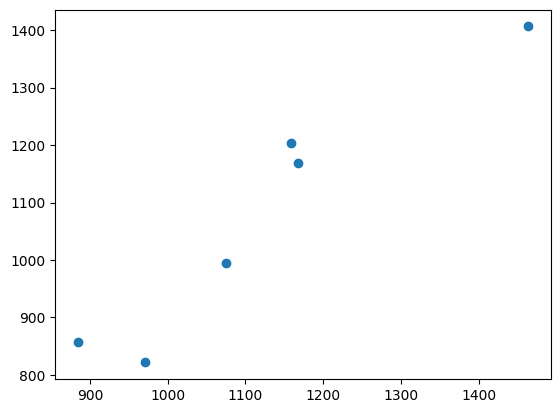

In [36]:
plt.scatter(y_test,y_pred)

In [37]:
residuals = y_test - y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


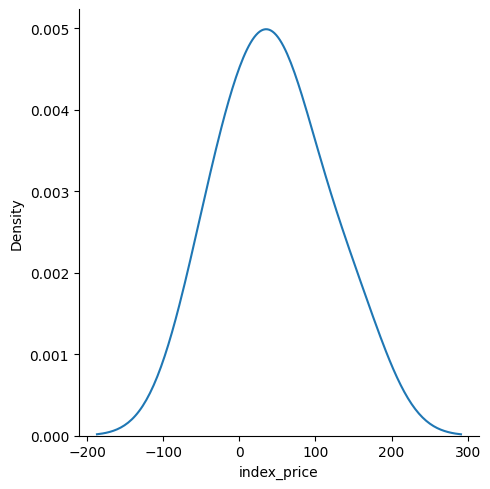

In [39]:
## Plot this residuals
sns.displot(residuals, kind="kde")

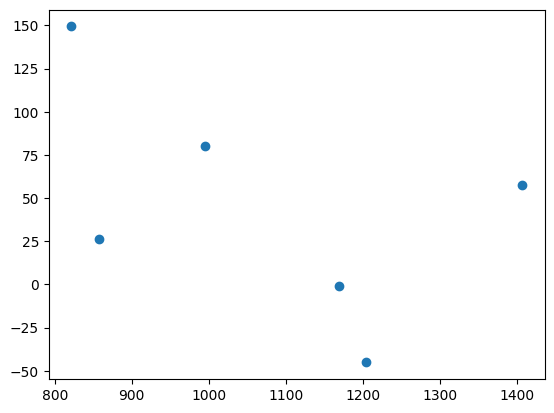

In [40]:
## scatter plot with respect to prediction and residuals
plt.scatter(y_pred, residuals)

In [41]:
# OLS linear regression
import statsmodels.api as sm
model = sm.OLS(y_train, X_train).fit()
model.summary()

c:\Users\aiman\Career_upskill\Udemy\Data ML NLP Bootcamp\Machine-Learning\venv\lib\site-packages\scipy\stats\_axis_nan_policy.py:430: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=18 observations were given.
  return hypotest_fun_in(*args, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Mon, 12 May 2025   Prob (F-statistic):                       0.754
Time:                        14:45:25   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [42]:
print(regression.intercept_)
print(regression.coef_)

1053.4444444444443
[  88.27275507 -116.25716066]
